# SimPy

In [3]:
!pip3 install simpy

In [0]:
import pandas as pd

import simpy

## Conceitos básicos

_______________

O comportamento de **componentes ativos** (veículos, clientes, passageiros, peças em uma linha de produção, etc.) é modelado com **processos (processes)**.

Todos os **processos** vivem em um **ambiente (environment)**

Os processos interagem entre si e com o ambiente por meio de **eventos** (por isso o nome simulação de *eventos* discretos)

__________

Os processos são descritos por ```generators``` de Python.

Durante sua vida, eles criam eventos e os entregam (```yield```) e espera até que sejam acionados.

Quando um processo gera um evento, o processo é suspenso. O SimPy retoma o processo, quando o evento ocorre (dizemos que o evento é acionado).

Um tipo de evento importante é o ```timeout```.

Eventos desse tipo são acionados após uma certa quantidade de tempo (simulado) ter passado. Eles permitem que um processo durma (ou mantenha seu estado) pelo tempo determinado.

Um ```timeout``` e todos os outros eventos podem ser criados chamando o método apropriado do ```Environment``` no qual o processo reside (```Environment.timeout()```, por exemplo).

### 1 - Um gerador de clientes

In [0]:
from scipy.stats import poisson

In [0]:
def client(env, caixa, cofre):
    req = caixa.request()
    yield req
    yield cofre.get(uniform(10, 1000).rvs())
    yield env.timeout(poisson(3).rvs())
    caixa.release(req)

def client_generator(env, caixa, cofre):
    while True:
        env.process(client(env, caixa, cofre))
        yield env.timeout(poisson(2).rvs())
        
def repositor(env, cofre):
    while True:
        if cofre.level < cofre.capacity * 0.7:
            yield env.timeout(300)
            yield cofre.put(cofre.capacity - cofre.level)
        else:
            yield env.timeout(5)

tamanho_da_fila = []
resta_no_cofre = []
def observador(env, caixa, cofre):
    while True:
        tamanho_da_fila.append(len(caixa.queue))
        resta_no_cofre.append(cofre.level)
        yield env.timeout(1)

In [0]:
env = simpy.Environment()

caixa = simpy.Resource(env, capacity=2)
cofre = simpy.Container(env, 100000, init=100000)

env.process(client_generator(env, caixa, cofre))
env.process(observador(env, caixa, cofre))
env.process(repositor(env, cofre))
env.run(until=1000)

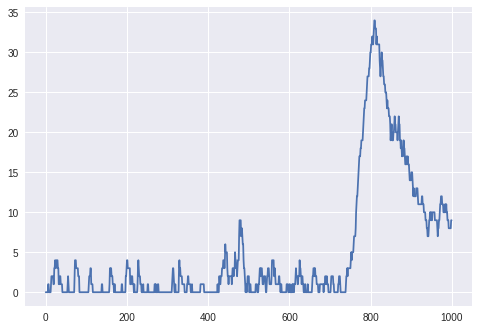

In [113]:
_ = pd.Series(tamanho_da_fila).plot()

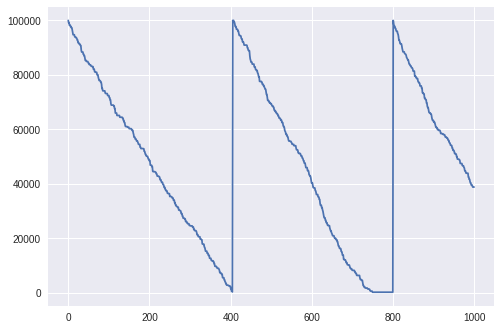

In [114]:
_ = pd.Series(resta_no_cofre).plot()

### 2 - Um caixa de banco (```Resource```)

```Resource.request()``` pede acesso ao recurso (ex: entra na fila se houver, ou ocupa o caixa se não houver ninguém lá)

```Resource.release()``` solta o acesso ao recurso (ex: sai do caixa e deixa o próximo da fila ir)



### 3 - Um cliente no caixa

### Um observador

### Aleatoriedade

In [0]:
from scipy.stats import poisson

In [0]:
_ = pd.Series(poisson(5).rvs(1000)).hist()

In [0]:
_ = pd.Series(poisson(25).rvs(1000)).hist()

In [0]:
def client(env, caixa):
    req = caixa.request()
    yield req
    yield env.timeout(poisson(3).rvs())
    caixa.release(req)

def client_generator(env, caixa):
    while True:
        env.process(client(env, caixa))
        yield env.timeout(poisson(2).rvs())

tamanho_da_fila = []
def observador(env, caixa):
    while True:
        tamanho_da_fila.append(len(caixa.queue))
        yield env.timeout(1)

In [0]:
env = simpy.Environment()
caixa = simpy.Resource(env, capacity=2)
env.process(client_generator(env, caixa))
env.process(observador(env, caixa))
env.run(until=1000)
_ = pd.Series(tamanho_da_fila).plot()

### ```Resource``` modela o acesso a um recurso discreto (caixa do banco) que é ocupado e depois liberado

### ```Container``` modela o acesso a um recurso aproximadamente contínuo (ex: gasolina, ou maças, ou dinheiro) que é consumido e/ou reposto

In [0]:
from scipy.stats import uniform

In [0]:
def client(env, caixa, cofre):
    req = caixa.request()
    yield req
    yield cofre.get(uniform(10, 10000).rvs())
    yield env.timeout(poisson(3).rvs())
    caixa.release(req)

def client_generator(env, caixa, cofre):
    while True:
        env.process(client(env, caixa, cofre))
        yield env.timeout(poisson(2).rvs())

tamanho_da_fila = []
resta_no_cofre = []
def observador(env, caixa, cofre):
    while True:
        tamanho_da_fila.append(len(caixa.queue))
        resta_no_cofre.append(cofre.level)
        yield env.timeout(1)

In [0]:
env = simpy.Environment()

caixa = simpy.Resource(env, capacity=50)
cofre = simpy.Container(env, 100000, init=100000)

env.process(client_generator(env, caixa, cofre))
env.process(observador(env, caixa, cofre))
env.run(until=1000)
_ = pd.Series(tamanho_da_fila).plot()

In [0]:
_ = pd.Series(resta_no_cofre).plot()

### Reposição de estoque

In [0]:
def client(env, caixa, cofre):
    req = caixa.request()
    yield req
    yield cofre.get(uniform(10, 1000).rvs())
    yield env.timeout(poisson(3).rvs())
    caixa.release(req)

def client_generator(env, caixa, cofre):
    while True:
        env.process(client(env, caixa, cofre))
        yield env.timeout(poisson(2).rvs())
        
def repositor(env, cofre):
    while True:
        if cofre.level < cofre.capacity * 0.3:
            yield env.timeout(300)
            yield cofre.put(cofre.capacity - cofre.level)
        else:
            yield env.timeout(5)

tamanho_da_fila = []
resta_no_cofre = []
def observador(env, caixa, cofre):
    while True:
        tamanho_da_fila.append(len(caixa.queue))
        resta_no_cofre.append(cofre.level)
        yield env.timeout(1)

In [0]:
env = simpy.Environment()

caixa = simpy.Resource(env, capacity=5)
cofre = simpy.Container(env, 100000, init=100000)

env.process(client_generator(env, caixa, cofre))
env.process(observador(env, caixa, cofre))
env.process(repositor(env, cofre))
env.run(until=1000)
_ = pd.Series(tamanho_da_fila).plot()

In [0]:
_ = pd.Series(resta_no_cofre).plot()